# Mountain Car

![title](mountain_car_pic.png)

A car is on a one-dimensional track, positioned between two "mountains". The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import gym

# Make Environment

In [2]:
env = gym.make('MountainCar-v0')

In [3]:
#DocString
?env.env

In [4]:
# Env Actions
directions = {"Left":0,"Null":1,"Right":2}
env.action_space

Discrete(3)

In [5]:
# Env Observation
obs = {"CarPosition":0,"CartVelocity":1}
env.observation_space

Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)

In [6]:
# Env Start
# The position of the car is assigned a uniform random value in [-0.6 , -0.4] 
env.reset()

array([-0.45632541,  0.        ])

In [7]:
# Accelerate Right Policy
env.reset()
for i in range(300):
    env.step(2)
    env.render()
    time.sleep(0.01)
    
env.close()

In [8]:
# Random Acceleration Policy
env.reset()
for i in range(200):
    action = env.action_space.sample()
    env.step(action)
    env.render()
    time.sleep(0.01)
    
env.close()

# Connect to CAS

In [9]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Create SAS RL Environment URL

In [10]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [11]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.325s, user: 0.678s, sys: 0.956s, mem: 0.255mb

# Change timeout

In [12]:
mytime = 60*60*24*2
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[Timeout]

 172800

[locale]

 'en_US'

[number of Connections]

 1

[state]

 'Connected'

+ Elapsed: 0.000764s, user: 0.00072s, mem: 0.203mb

# Train the Agent - Deep Q Networks

In [13]:
# results = conn.reinforcementLearn.rlTrainDqn(
    
#     # RL Arguments
#     environment=dict(type='remote', url=sasrl_env_url, name='MountainCar-v0', render=False, seed=802),
#     exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
#     gamma = 0.99,
#     numEpisodes = 25000,
    
#     # NN Arguments
#     QModel=[{'type':'FC', 'n':64, 'act':'RELU'},
#             {'type':'FC', 'n':128, 'act':'RELU'}],
#     optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
#     minReplayMemory = 10,
#     maxReplayMemory = 1000,
#     targetUpdateInterval = 100,
    
#     # Test Arguments
#     testInterval = 10,
#     numTestEpisodes = 1,
    
#     # Other Arguments
#     modelOut=dict(name='dqn_weights', replace=True),
#     seed = 919
    
# )

# Save the Model

In [14]:
# Add a CASlib
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# Save Optimization History
# pd.DataFrame(results["OptIterHistory"]).to_csv("D:/Workshop/Winsas/VOSI/mountain_car_opthist.csv", index=False)

In [16]:
# Save DQN Weights
# conn.table.save(caslib = 'mycl', table = 'dqn_weights', name = 'mountain_car_dqn_weights', replace = True)
# conn.table.attribute(caslib = 'CASUSER', table = 'mountain_car_dqn_weights_attr', name = 'dqn_weights', task='convert')
# conn.table.save(caslib = 'mycl', table = 'mountain_car_dqn_weights_attr', name = 'mountain_car_dqn_weights_attr', replace = True)

# Load the Model

In [17]:
# Load Optimization History
results = pd.read_csv("D:/Workshop/Winsas/VOSI/mountain_car_opthist.csv")

In [18]:
# Load DQN Weights
conn.table.loadTable(caslib = 'mycl', path="mountain_car_dqn_weights.sashdat", casOut=dict(name="dqn_weights", replace=True))
conn.table.loadTable(caslib = 'mycl', path="mountain_car_dqn_weights_attr.sashdat", casOut=dict(name="dqn_weights_attr", replace=True))
conn.table.attribute(caslib='CASUSER', task='ADD', name='dqn_weights', attrtable='dqn_weights_attr')

NOTE: Cloud Analytic Services made the file mountain_car_dqn_weights.sashdat available as table DQN_WEIGHTS in caslib CASUSER(student).
NOTE: Cloud Analytic Services made the file mountain_car_dqn_weights_attr.sashdat available as table DQN_WEIGHTS_ATTR in caslib CASUSER(student).


+ Elapsed: 0.000902s, user: 0.000849s, mem: 0.309mb

# View Results

In [19]:
results

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,-1.767006,-1.757299,0.000165,-200.0
1,10,-17.924733,-18.034602,0.017640,-200.0
2,20,-29.618428,-29.693044,0.040902,-200.0
3,30,-38.415153,-38.313149,0.025462,-200.0
4,40,-42.165839,-42.250632,0.035416,-200.0
...,...,...,...,...,...
2496,24960,-54.345923,-53.745898,43.219932,-200.0
2497,24970,-57.975078,-58.011518,1.314101,-200.0
2498,24980,-40.455506,-40.753391,2.654132,-121.0
2499,24990,-38.590330,-38.623395,2.060030,-196.0


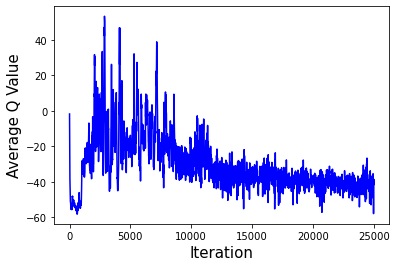

In [20]:
plt.plot(results['Iteration'],results['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

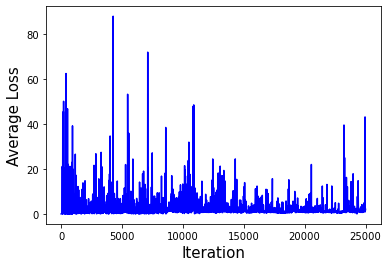

In [21]:
plt.plot(results['Iteration'],results['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

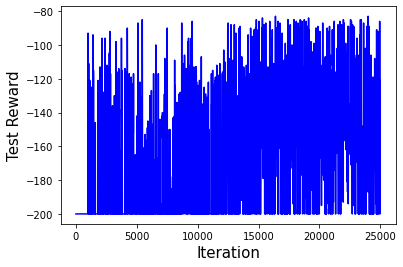

In [22]:
plt.plot(results['Iteration'],results['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [23]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='MountainCar-v0', 
                     render=True, renderFreq=10, renderSleep=0, seed=802),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=    -1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=    -2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=    -3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=    -4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=    -5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=    -6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=    -7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=    -8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=    -9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=   -10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=   -11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=   -12
         Episode=        1 S

,Property,Value
0,Number of State Variables,2
1,Number of Actions,3
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [24]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_Action_,_Reward_,_Done_
0,0.0,1.0,-0.548274,0.000000,2.0,-1.0,0.0
1,1.0,1.0,-0.547089,0.001185,2.0,-1.0,0.0
2,2.0,1.0,-0.544728,0.002361,2.0,-1.0,0.0
3,3.0,1.0,-0.541209,0.003519,2.0,-1.0,0.0
4,4.0,1.0,-0.536557,0.004651,2.0,-1.0,0.0
...,...,...,...,...,...,...,...
120,120.0,1.0,0.380891,0.028455,2.0,-1.0,0.0
121,121.0,1.0,0.409308,0.028417,2.0,-1.0,0.0
122,122.0,1.0,0.437885,0.028577,2.0,-1.0,0.0
123,123.0,1.0,0.466826,0.028941,2.0,-1.0,0.0


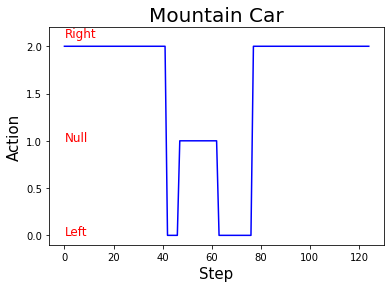

In [25]:
plt.plot(df["_Action_"], color="blue")
plt.title("Mountain Car", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Action", fontsize=15)
plt.ylim(-0.1,2.2)
plt.text(0,0,"Left", color="red", fontsize=12)
plt.text(0,1,"Null", color="red", fontsize=12)
plt.text(0,2.1,"Right", color="red", fontsize=12)
plt.show()

# End the Session

In [26]:
conn.session.endSession()

+ Elapsed: 0.000305s, user: 0.000112s, sys: 0.000179s, mem: 0.221mb